In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

In [69]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [70]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [71]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [72]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


**Assessing and cleaning matches data**

In [73]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [74]:
matches.shape

(1095, 20)

In [75]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

Null Values containing columns = city , player_of_match , winner , result_margin , target_runs , target_overs , method

In [76]:
matches[matches['city'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni


In [77]:
# Fill null value of city to unknown
matches['city'] = matches['city'].fillna('Unknown')

In [78]:
matches[matches['city'].isnull()].shape

(0, 20)

In [79]:
matches.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
543,980953,2016,Hyderabad,2016-04-30,League,DA Warner,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,15.0,195.0,20.0,N,NaN,AK Chaudhary,HDPK Dharmasena
403,729289,2014,Unknown,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
263,548322,2012,Pune,2012-04-14,League,JD Ryder,Subrata Roy Sahara Stadium,Pune Warriors,Chennai Super Kings,Chennai Super Kings,bat,Pune Warriors,wickets,7.0,156.0,20.0,N,NaN,Aleem Dar,BNJ Oxenford
280,548341,2012,Pune,2012-04-26,League,CL White,Subrata Roy Sahara Stadium,Pune Warriors,Deccan Chargers,Deccan Chargers,bat,Deccan Chargers,runs,18.0,178.0,20.0,N,NaN,S Ravi,RJ Tucker
214,501238,2011,Delhi,2011-05-02,League,P Parameswaran,Feroz Shah Kotla,Delhi Daredevils,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7.0,141.0,20.0,N,NaN,Asad Rauf,SL Shastri


In [80]:
matches['player_of_match'] = matches['player_of_match'].fillna('No Award')
matches['winner'] = matches['winner'].fillna('No Result')

In [81]:
matches[matches['result_margin'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,No Award,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,No Result,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,No Award,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,No Result,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,No Award,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,No Result,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


In [82]:
matches['result_margin'] = matches['result_margin'].fillna(0)

In [83]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

**Deliveries Dataset**

In [84]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [85]:
deliveries['extras_type'] = deliveries['extras_type'].fillna('No Extras')

In [86]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('Not Out')
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('None')
deliveries['fielder'] = deliveries['fielder'].fillna('None')

In [87]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

Name Checking

In [88]:
matches_copy = matches.copy()
deliveries_copy = deliveries.copy()

In [89]:
matches = matches.replace('Delhi Daredevils','Delhi Capitals')

In [90]:
deliveries = deliveries.replace('Delhi Daredevils','Delhi Capitals')

In [91]:
matches['date'] = pd.to_datetime(matches['date'])

In [92]:
matches[matches.duplicated()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [93]:
deliveries[deliveries.duplicated()]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder


In [94]:
deliveries[deliveries['total_runs'] > 7]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder


Change any one from ->
1. Kings XI Punjab or Punjab Kings
2. Rising Pune Supergiant	-> Rising Pune Supergiants -> Pune Warriors
3. Royal Challengers Bangalore	-> Royal Challengers Bengaluru
4. Gujarat Lions or Gujrat Titans




In [95]:
matches = matches.replace('Punjab Kings','Kings XI Punjab')
deliveries = deliveries.replace('Punjab Kings','Kings XI Punjab')
matches = matches.replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries = deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches = matches.replace('Pune Warriors','Rising Pune Supergiants')
deliveries = deliveries.replace('Pune Warriors','Rising Pune Supergiants')
matches = matches.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
deliveries = deliveries.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
matches = matches.replace('Gujrat Titans','Gujarat Lions')
deliveries = deliveries.replace('Gujrat Titans','Gujarat Lions')
matches = matches.replace('Gujarat Lions','Gujarat Titans')
deliveries = deliveries.replace('Gujarat Lions','Gujarat Titans')

In [96]:
matches['season'] = matches['season'].apply(lambda x: int(str(x).split('/')[0]) if '/' in str(x) else int(x))

In [97]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [98]:
matches = matches.rename(columns={'id' : 'match_id'})

In [99]:
deliveries.shape

(260920, 17)

In [100]:
matches.to_csv('matches_cleaned.csv', index=False)
deliveries.to_csv('deliveries_cleaned.csv', index=False)

**Data Analysis**

In [101]:
matches_df = pd.read_csv('/content/matches_cleaned.csv')
deliveries_df = pd.read_csv('/content/deliveries_cleaned.csv')

In [102]:
deliveries_df['extras_type'] = deliveries_df['extras_type'].fillna('No Extras')
deliveries_df['dismissal_kind'] = deliveries_df['dismissal_kind'].fillna('Not Known')
deliveries_df['fielder'] = deliveries_df['fielder'].fillna('Unknown')

In [103]:
matches_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


**Team Analysis**

In [104]:
# Which team has won the most matches in IPL history?
matches['winner'].value_counts().head(1)

,count
winner,
Mumbai Indians,144


In [105]:
# What is the average margin of victory for each team?
matches['result_margin'].mean()

16.959817351598172

In [106]:
matches_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [107]:
# Total matches played per season.
matches_per_season = matches_df['season'].value_counts()
matches_per_season

,count
season,
2009,117
2013,76
2012,74
2022,74
2023,74
2011,73
2024,71
2014,60
2016,60


Text(0.5, 1.0, 'Season vs Count')

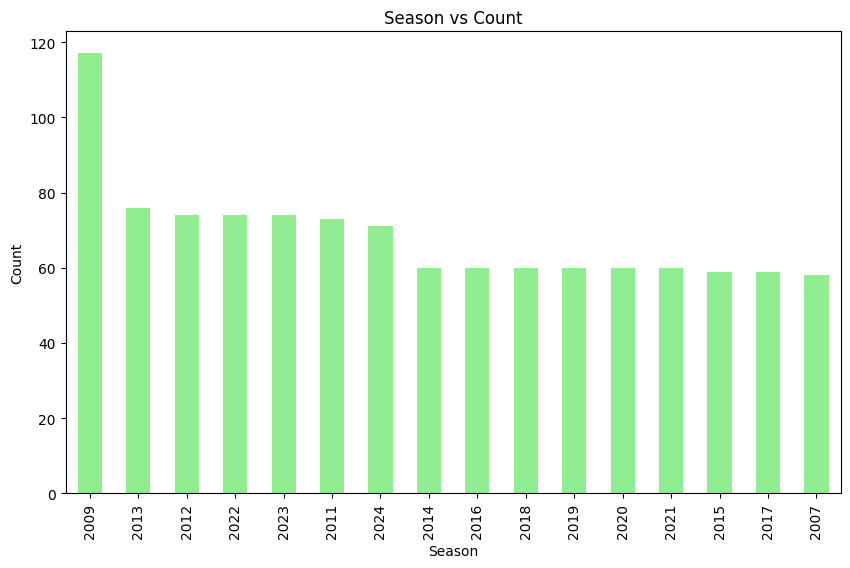

In [108]:
plt.figure(figsize=(10, 6))
matches_per_season.plot(kind='bar',color='lightgreen')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season vs Count')

In [109]:
# Average runs scored in each season.
matches_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [110]:
mean_runs_in_each_season = matches_df.groupby('season')['target_runs'].mean()
mean_runs_in_each_season

,target_runs
season,
2007,159.775862
2009,157.512821
2011,154.041667
2012,158.540541
2013,156.894737
2014,162.383333
2015,164.706897
2016,160.783333
2017,165.406780


Text(0.5, 1.0, 'Season vs Count')

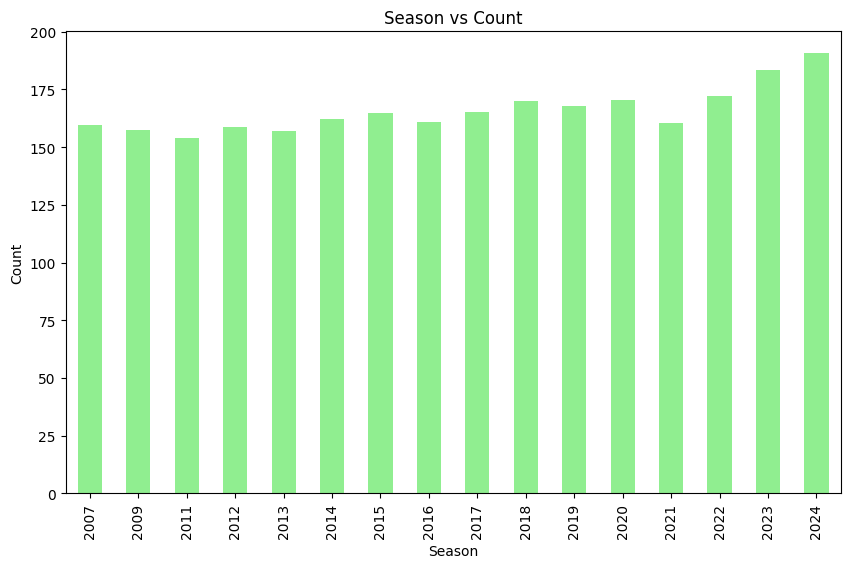

In [111]:
plt.figure(figsize=(10, 6))
mean_runs_in_each_season.plot(kind='bar',color='lightgreen')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season vs Count')

Some Plots

In [112]:
deliveries_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Out,Not Known,Unknown
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extras,0,Not Out,Not Known,Unknown


<Axes: xlabel='batsman_runs', ylabel='Count'>

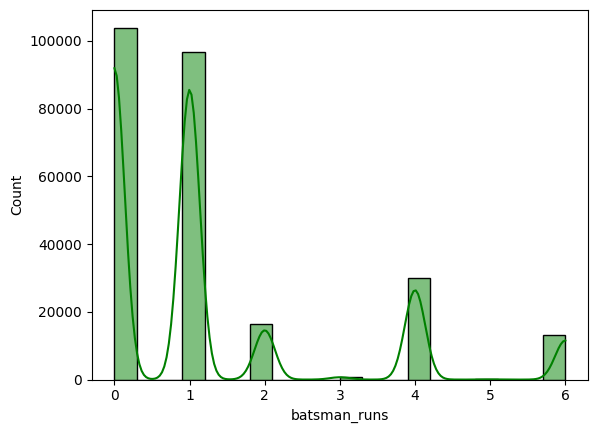

In [113]:
sns.histplot(deliveries_df['batsman_runs'], bins=20, kde=True,color='green')

Relationships

In [114]:
# Does winning the toss lead to winning the match?
(len(matches_df[matches_df['toss_winner'] == matches_df['winner']]))/(len(matches_df))*100

50.593607305936075

More Analysis

In [115]:
# Calculating the chances of IPL Win of each team
matches_df.head(2)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [116]:
final_matches = matches_df[matches_df['match_type'] == 'Final']
final_matches.groupby('winner')['winner'].value_counts()

,count
winner,
Chennai Super Kings,5
Deccan Chargers,1
Gujarat Titans,1
Kolkata Knight Riders,3
Mumbai Indians,5
Rajasthan Royals,1
Sunrisers Hyderabad,1


In [117]:
total_matches = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()
winning_matches = matches_df['winner'].value_counts()
winning_percentage = ((winning_matches/total_matches)*100).sort_values(ascending=False)
winning_percentage

,count
Chennai Super Kings,57.983193
Mumbai Indians,55.172414
Gujarat Titans,54.666667
Lucknow Super Giants,54.545455
Kolkata Knight Riders,52.191235
Rajasthan Royals,50.678733
Sunrisers Hyderabad,48.351648
Royal Challengers Bangalore,48.235294
Delhi Capitals,45.634921
Kings XI Punjab,45.528455


<Axes: >

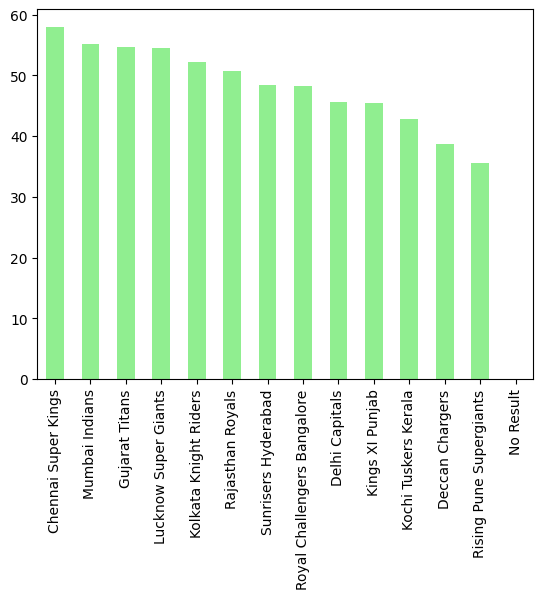

In [118]:
winning_percentage.plot(kind='bar',color='lightgreen')

Player_Specific_Analysis

In [119]:
deliveries_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Out,Not Known,Unknown
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extras,0,Not Out,Not Known,Unknown


In [120]:
deliveries_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(5)

,batsman_runs
batter,
V Kohli,8014
S Dhawan,6769
RG Sharma,6630
DA Warner,6567
SK Raina,5536


In [121]:
sixes = deliveries_df[deliveries_df['batsman_runs'] == 6]
sixes.groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(5)

,batsman_runs
batter,
CH Gayle,359
RG Sharma,281
V Kohli,273
AB de Villiers,253
MS Dhoni,252


In [122]:
deliveries_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Out,Not Known,Unknown
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extras,0,Not Out,Not Known,Unknown


In [123]:
# Player of the Match Trends
matches_df['player_of_match'].value_counts().head(10)

,count
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
DA Warner,18
V Kohli,18
MS Dhoni,17
SR Watson,16
YK Pathan,16
RA Jadeja,16


In [124]:
# Best Partnerships
deliveries_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Out,Not Known,Unknown
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extras,0,Not Out,Not Known,Unknown


In [125]:
deliveries_df['Partnership'] = deliveries_df['batter'] + ' ,' + deliveries_df['non_striker']

In [126]:
best_partnerships = deliveries_df.groupby(['match_id','Partnership'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False)
best_partnerships.head(10)

,match_id,Partnership,batsman_runs
23487,1304112,"Q de Kock ,KL Rahul",140
12533,829795,"AB de Villiers ,V Kohli",133
13905,980987,"AB de Villiers ,V Kohli",129
8829,598027,"CH Gayle ,TM Dilshan",127
7805,548372,"CH Gayle ,V Kohli",127
17600,1175366,"JM Bairstow ,DA Warner",114
6833,548329,"DA Warner ,NV Ojha",109
7596,548363,"RG Sharma ,HH Gibbs",109
312,335994,"AC Gilchrist ,VVS Laxman",109
19681,1216527,"MA Agarwal ,KL Rahul",106


In [127]:
# High-Scoring Matches
matches_df.head(2)
highest_scores = matches_df.sort_values(by='target_runs',ascending=False)
highest_scores[['team1','team2','season','winner','target_runs']].head(10)

,team1,team2,season,winner,target_runs
1053,Sunrisers Hyderabad,Royal Challengers Bangalore,2024,Sunrisers Hyderabad,288.0
1031,Sunrisers Hyderabad,Mumbai Indians,2024,Sunrisers Hyderabad,278.0
1039,Kolkata Knight Riders,Delhi Capitals,2024,Kolkata Knight Riders,273.0
1058,Sunrisers Hyderabad,Delhi Capitals,2024,Sunrisers Hyderabad,267.0
352,Royal Challengers Bangalore,Rising Pune Supergiants,2013,Royal Challengers Bangalore,264.0
1065,Kolkata Knight Riders,Kings XI Punjab,2024,Kings XI Punjab,262.0
1066,Delhi Capitals,Mumbai Indians,2024,Delhi Capitals,258.0
987,Lucknow Super Giants,Kings XI Punjab,2023,Lucknow Super Giants,258.0
560,Royal Challengers Bangalore,Gujarat Titans,2016,Royal Challengers Bangalore,249.0
146,Chennai Super Kings,Rajasthan Royals,2009,Chennai Super Kings,247.0
